## Tarea 2
### Alumnos: 
* Carlos Adrián Alarcón 
* Deigo Acevedo


In [1]:
import warnings
warnings.filterwarnings('ignore')

In [19]:
### Librerías

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import gurobipy as gp
from gurobipy import GRB
from math import sqrt
import seaborn as sns
import pandas as pd

### Problema 1



#### Primera figura

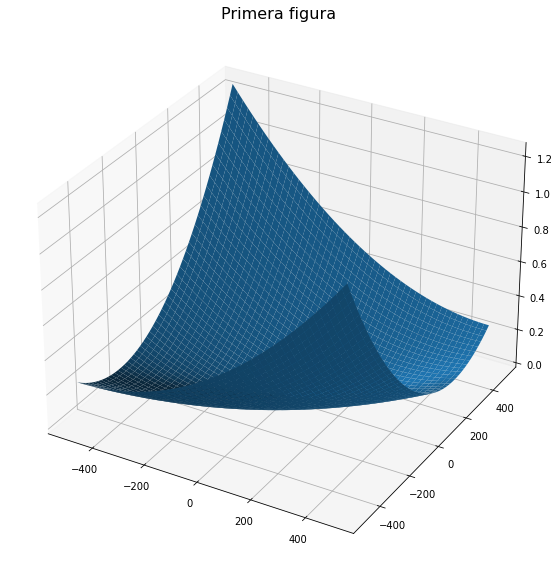

In [4]:
valmin = -500
valmax = 500
numptos = 500
x_1 = np.linspace(valmin, valmax, numptos)
x_2 = np.linspace(valmin, valmax, numptos)
x_1, x_2 = np.meshgrid(x_1, x_2)
f = -2*x_1*x_2 - 2*x_2 + np.square(x_1)+2*np.square(x_2)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize = (10,10))
surf = ax.plot_surface(x_1, x_2, f)
plt.title('Primera figura', fontsize = 16)
fig.show()

In [5]:
m = gp.Model("model_uno")
x = m.addVar(vtype=GRB.CONTINUOUS, name="x")
y = m.addVar(vtype=GRB.CONTINUOUS, name="y")
m.setObjective( -2*x*y - 2*y + np.square(x)+2*np.square(y), sense=GRB.MINIMIZE)
m.params.NonConvex = 2
m.optimize()
print('Resultado óptimo = ', '{0:.2f}'.format(m.objVal))

for v in m.getVars():
    print(v.varName, ' = ', '{0:.2f}'.format(v.x))

Restricted license - for non-production use only - expires 2024-10-28
Set parameter NonConvex to value 2
Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[arm])

CPU model: Apple M1 Pro
Thread count: 10 physical cores, 10 logical processors, using up to 10 threads

Optimize a model with 0 rows, 2 columns and 0 nonzeros
Model fingerprint: 0x09e965f4
Model has 3 quadratic objective terms
Coefficient statistics:
  Matrix range     [0e+00, 0e+00]
  Objective range  [2e+00, 2e+00]
  QObjective range [2e+00, 4e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [0e+00, 0e+00]
Presolve time: 0.01s
Presolved: 0 rows, 2 columns, 0 nonzeros
Presolved model has 3 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 1
 AA' NZ     : 0.000e+00
 Factor NZ  : 1.000e+00
 Factor Ops : 1.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl   

##### Caracterización de primera función

En base a la gráfica, se puede observar que la función es convexa. Esto se valida gráficamente con la imagen generada en la primera celda. Como se trata de una función convexa, se puede identificar que no existe máximos locales o globales, por lo que, de ejecutarse en Gurobi, este proceso sería infinito. Por ese motivo, se decidió ejecutarlo solamente para hallar puntos mínimos. De acuerdo con la resolución de Gurobi, el punto óptimo es (1,1), sin embargo, quedaría pendiente analizar si se trata de un mínimo local o global. Para hacerlo, se analizará el criterio del Hessiano. En primer lugar, se calculará la matriz Hessiana y se hallará el determinante de la matriz en el punto hallado por Gurobi:

![](https://user-images.githubusercontent.com/83436724/205773205-fa16e1f1-4f18-4281-83ed-8ec5910e398e.png)

El determinante del Hessiano es mayor a 0, por lo que se concluye que se trata de un mínimo global , debido a que, además, la función, gráficamente, muestra que es total convexa.

#### Segunda figura

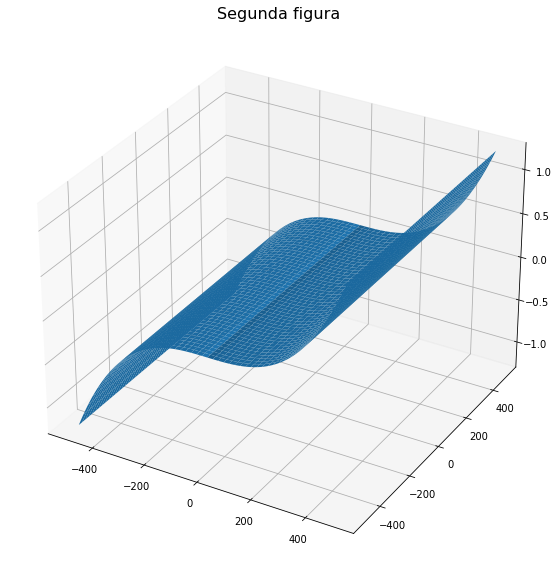

In [6]:
f = np.power(x_1,3) + x_2 
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize = (10,10))
surf = ax.plot_surface(x_1, x_2, f)
plt.title('Segunda figura', fontsize = 16)
fig.show()

In [9]:
m = gp.Model("model_dos")
x = m.addVar(vtype=GRB.CONTINUOUS, name="x")
y = m.addVar(vtype=GRB.CONTINUOUS, name="y")
u = m.addVar(vtype=GRB.CONTINUOUS, name="u")
m.addGenConstrPow(x, u, 3)
m.update()
m.setObjective(u + y , sense=GRB.MINIMIZE)
m.params.NonConvex = 2
m.optimize()

print('Función Objetivo = ', '{0:.2f}'.format(m.objVal))

for v in m.getVars():
    print(v.varName, ' = ', '{0:.2f}'.format(v.x))

Set parameter NonConvex to value 2
Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[arm])

CPU model: Apple M1 Pro
Thread count: 10 physical cores, 10 logical processors, using up to 10 threads

Optimize a model with 0 rows, 3 columns and 0 nonzeros
Model fingerprint: 0x10c33d62
Model has 1 general constraint
Variable types: 3 continuous, 0 integer (0 binary)
Coefficient statistics:
  Matrix range     [0e+00, 0e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [0e+00, 0e+00]
Found heuristic solution: objective 0.0000000

Explored 0 nodes (0 simplex iterations) in 0.00 seconds (0.00 work units)
Thread count was 1 (of 10 available processors)

Solution count 1: 0 

Optimal solution found (tolerance 1.00e-04)
Best objective 0.000000000000e+00, best bound 0.000000000000e+00, gap 0.0000%
Función Objetivo =  0.00
x  =  0.00
y  =  0.00
u  =  0.00


In [8]:
m.setObjective(u + y , sense=GRB.MAXIMIZE)
m.params.NonConvex = 2
m.optimize()

Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[arm])

CPU model: Apple M1 Pro
Thread count: 10 physical cores, 10 logical processors, using up to 10 threads

Optimize a model with 0 rows, 3 columns and 0 nonzeros
Model fingerprint: 0x96acd998
Model has 1 general constraint
Variable types: 3 continuous, 0 integer (0 binary)
Coefficient statistics:
  Matrix range     [0e+00, 0e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [0e+00, 0e+00]

Loaded MIP start from previous solve with objective -0

Presolve time: 0.00s

Explored 0 nodes (0 simplex iterations) in 0.00 seconds (0.00 work units)
Thread count was 1 (of 10 available processors)

Solution count 1: -0 
No other solutions better than 0

Model is unbounded
Best objective -0.000000000000e+00, best bound -, gap -


##### Caracterización de segunda función

En base a la gráfica, se puede observar que, aparentemente, la función no es ni convexa ni cóncava. En ese sentido, al optimizar buscando un punto máximo, Gurobi indica que no está definido, mientras que, al optimizar buscado un punto mínimo, se obtiene como respuesta el punto (0,0). Para validar si efectivamente este punto se trata de un mínimo local, mínimo global o ninguno, se hace el análisis del Hessiano y el determinante de este:

![](https://user-images.githubusercontent.com/83436724/205773611-561ac75e-350c-47f9-8b6e-3356046fa7a9.png)

Se puede observar que el determinante del Hessiano es 0, por lo que se concluye que el punto obtenido por Gurobi no es ni máximo ni mínimo, sino que se trata de un punto silla

### Problema 2

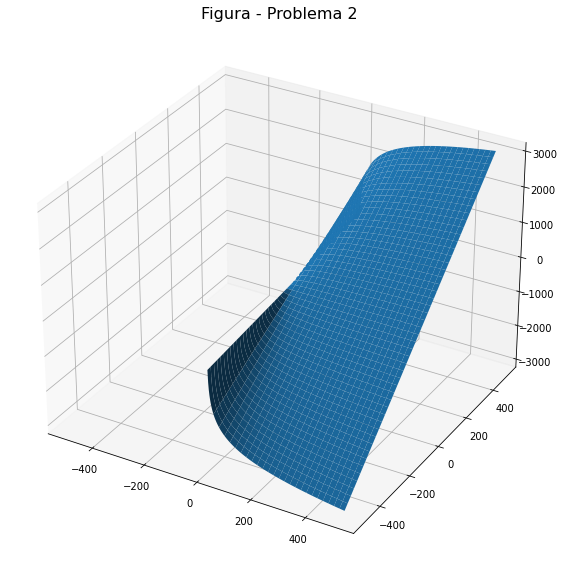

In [11]:
# Gráfico de la función objetivo
f = np.log(x_1+1)*  x_2 
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize = (10,10))
surf = ax.plot_surface(x_1, x_2, f)
plt.title('Figura - Problema 2', fontsize = 16)
fig.show()

In [12]:

modelo_p2= gp.Model('problema_dos')

#Variables

x = modelo_p2.addVar(vtype=GRB.CONTINUOUS, name='x')
y = modelo_p2.addVar(vtype=GRB.CONTINUOUS, name='y') 
z = modelo_p2.addVar(vtype=GRB.CONTINUOUS, name='z') 
u = modelo_p2.addVar(vtype=GRB.CONTINUOUS, name='u')

#Restricciones

r1= modelo_p2.addConstr(2*x + y <= 3, name='r1')
r2= modelo_p2.addConstr(u==x+1, name='r2')
r3= modelo_p2.addConstr(x>=0, name='r3')
r4= modelo_p2.addConstr(y>=0, name='r4')
lnc = modelo_p2.addGenConstrLog(u, z, 'log', "FuncPieces=-1")


#Optimización

modelo_p2.setObjective(z*y, sense = GRB.MAXIMIZE) 
modelo_p2.update()
modelo_p2.params.NonConvex = 2
modelo_p2.optimize()

Set parameter NonConvex to value 2
Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[arm])

CPU model: Apple M1 Pro
Thread count: 10 physical cores, 10 logical processors, using up to 10 threads

Optimize a model with 4 rows, 4 columns and 6 nonzeros
Model fingerprint: 0xe5b2a7cc
Model has 1 quadratic objective term
Model has 1 general constraint
Variable types: 4 continuous, 0 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 3e+00]
Presolve added 20 rows and 20 columns
Presolve time: 0.01s
Presolved: 26 rows, 25 columns, 90 nonzeros
Presolved model has 1 bilinear constraint(s)
Variable types: 15 continuous, 10 integer (10 binary)

Root relaxation: objective 1.528566e+00, 15 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | 

In [13]:
for v in modelo_p2.getVars():
    print(v.varName, ' = ', '{0:.3f}'.format(v.x))

x  =  0.666
y  =  1.667
z  =  0.510
u  =  1.666


In [14]:
print('Valor óptimo = ', '{0:.2f}'.format(modelo_p2.objVal))

Valor óptimo =  0.85


#### Resolución

Para caracterizar el punto óptimo, se hace el análisis del Hessiano y su determinante evaluado en este. A continuación se muestra el detalle:

![](https://user-images.githubusercontent.com/83436724/205775506-70e61fae-b24e-47e4-8041-ccfec8829aca.png)

Se puede observar que el determinante del Hessiano es menor a 0, por lo que se trataría de un punto de silla. Asimismo, al ser el punto optimizado, podríamos concluir que no se tiene certeza de que la función sea convexa o cóncava.

Asimismo, se realizó un análisis postoptimal para determinar el impacto de la capacidad disponible


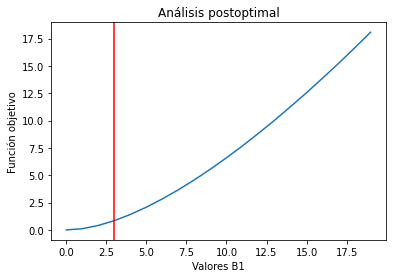

In [36]:
n = 20
valores = []

modelo_p2.setParam('OutputFlag', 0)
for i in range(0,n):
  r1.RHS = i
  modelo_p2.optimize()
  valores.append(modelo_p2.objVal)


x = np.arange(0,n)

pares = pd.DataFrame(x,columns = ['b1'])
pares['objetivo'] = valores

fig, ax = plt.subplots()
sns.lineplot(data = pares,x = 'b1', y = 'objetivo')
plt.axvline(x = 3, color = 'red')
plt.title('Análisis postoptimal')
plt.xlabel('Valores B1')
plt.ylabel('Función objetivo')
plt.show()


Se puede observar que la restricción es una restricción activa, lo que significa que, mientras la capacidad disponible aumente, la función objetivo (producción total) aumenta. En una corrida con 20 valores posibles, se puede ver que con 19 de capacidad disponible, se logra un valor de 18.08 en la función objetivo. A continuación, se muestran los pares del análisis postoptimal.

In [37]:
pares

,b1,objetivo
0,0,-0.000000
1,1,0.111383
2,2,0.408166
3,3,0.849990
4,4,1.414582
5,5,2.081799
6,6,2.838895
7,7,3.674686
8,8,4.582613
9,9,5.560289
